In [19]:
from sklearn.linear_model import RidgeCV
import numpy as np
import pandas as pd
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
import math
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
import arff



#### Q2 a Tree-Based Methods (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/ APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are nu-meric.


#### Q2 b Data Preparation This data set has missing values. When the number of data with missing values is signicant, discarding them is not a good idea. 3

#### i. Research what types of techniques are usually used for dealing with data with missing values.4 Pick at least one of them and apply it to this data in the next steps.5

Some common techniques to fill missing data are:

##### Imputing with mean
##### Imputing with median
##### Imputing categorical data with mode
##### Using KNN to impute missing values
##### Forward fill/ Backward fill

In [20]:
df_test = pd.read_csv("aps_failure_test_set.csv",skiprows=20,na_values=['na'])
df_train = pd.read_csv("aps_failure_training_set.csv",skiprows=20,na_values=['na'])

In [21]:
# Replace the values with mean
df_test_mean = df_test.fillna(df_test.mean())
df_train_mean = df_train.fillna(df_train.mean())

#df_test_mean.to_csv("df_test_mean.csv", sep=',')
#df_train_mean.to_csv("df_train_mean.csv", sep=',')




#### Q2 b 2 For each of the 170 features, calculate the coecient of variation CV = s m, where s is sample variance and m is sample mean. 

In [23]:
npa1 = df_train_mean.iloc[:,1:]
npa = npa1.values


cv =  lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=npa)
var


array([3.56434050e+05, 3.86644886e+00, 1.67604690e+09, 6.44286022e+09,
       3.66740049e+03, 3.83201834e+03, 1.87095003e+06, 1.18535355e+06,
       2.59628066e+06, 6.47621046e+06, 1.27525066e+07, 9.49624246e+06,
       9.11566304e+06, 4.00870791e+06, 1.34732564e+06, 5.56459202e+06,
       9.57593536e+06, 2.92556612e+06, 2.19421748e+06, 5.44021915e+06,
       4.86897090e+06, 7.65449479e+06, 1.73471588e+07, 1.53370322e+07,
       9.39725679e+06, 3.56722230e+06, 5.83579521e+01, 9.46437519e+05,
       2.79132682e+06, 1.07122659e+06, 3.73284533e+04, 5.62811907e+03,
       1.67261096e+07, 2.78020047e+07, 1.65300857e+07, 5.83349012e+06,
       1.17689723e+07, 1.71736081e+07, 9.85677864e+06, 1.66756073e+07,
       1.49840484e+07, 8.16158906e+06, 6.83045862e+05, 2.58481086e+05,
       1.39302208e+06, 4.83677339e+06, 1.17208679e+07, 1.93235345e+07,
       7.85636601e+06, 4.47514646e+06, 3.32816724e+05, 2.49241922e+05,
       1.00757857e+07, 6.08479812e+06, 3.42337405e+06, 2.02139410e+06,
      

#### Q2 b 3 Plot a correlation matrix for your features using pandas or any other tool.

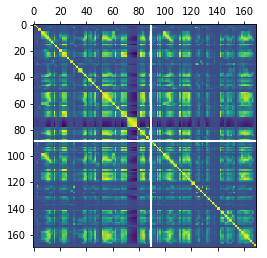

In [7]:
plt.matshow(df_test_mean.corr())

##### Q2 b 4 Pick bp 170c features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about signicance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We pickedthem only for visualization.

In [8]:
npa1 = df_train_mean.iloc[:,1:]
npa = npa1.values
cv =  lambda x: np.var(x) / np.mean(x)
var = np.apply_along_axis(cv, axis=0, arr=npa)
col=npa1.columns.values
colvar=pd.DataFrame(np.column_stack([col, var]))
print("Coeficients of all the coloumns Except the variable named 'class'")
print(colvar)

Coeficients of all the coloumns Except the variable named 'class'
          0            1
0    aa_000       356434
1    ab_000      3.86645
2    ac_000  1.67605e+09
3    ad_000  6.44286e+09
4    ae_000       3667.4
5    af_000      3832.02
6    ag_000  1.87095e+06
7    ag_001  1.18535e+06
8    ag_002  2.59628e+06
9    ag_003  6.47621e+06
10   ag_004  1.27525e+07
11   ag_005  9.49624e+06
12   ag_006  9.11566e+06
13   ag_007  4.00871e+06
14   ag_008  1.34733e+06
15   ag_009  5.56459e+06
16   ah_000  9.57594e+06
17   ai_000  2.92557e+06
18   aj_000  2.19422e+06
19   ak_000  5.44022e+06
20   al_000  4.86897e+06
21     am_0  7.65449e+06
22   an_000  1.73472e+07
23   ao_000   1.5337e+07
24   ap_000  9.39726e+06
25   aq_000  3.56722e+06
26   ar_000       58.358
27   as_000       946438
28   at_000  2.79133e+06
29   au_000  1.07123e+06
..      ...          ...
140  dl_000    3.925e+07
141  dm_000  9.07182e+06
142  dn_000       277526
143  do_000       125640
144  dp_000      26715.4
145  dq_0

In [9]:
sorte = colvar.sort_values(1, ascending=False)
highvar11= sorte.head(int(math.floor(math.sqrt(170))))
#selcol = df_[highvar11[0]]
#selcol
print("Selected highest 13 variables")
highvar11

Selected highest 13 variables


,0,1
91,cf_000,6.45637e+09
109,co_000,6.44641e+09
3,ad_000,6.44286e+09
145,dq_000,2.00278e+09
2,ac_000,1.67605e+09
155,eb_000,1.75487e+08
136,dh_000,6.22338e+07
122,cs_009,4.31322e+07
140,dl_000,3.925e+07
149,du_000,3.1471e+07


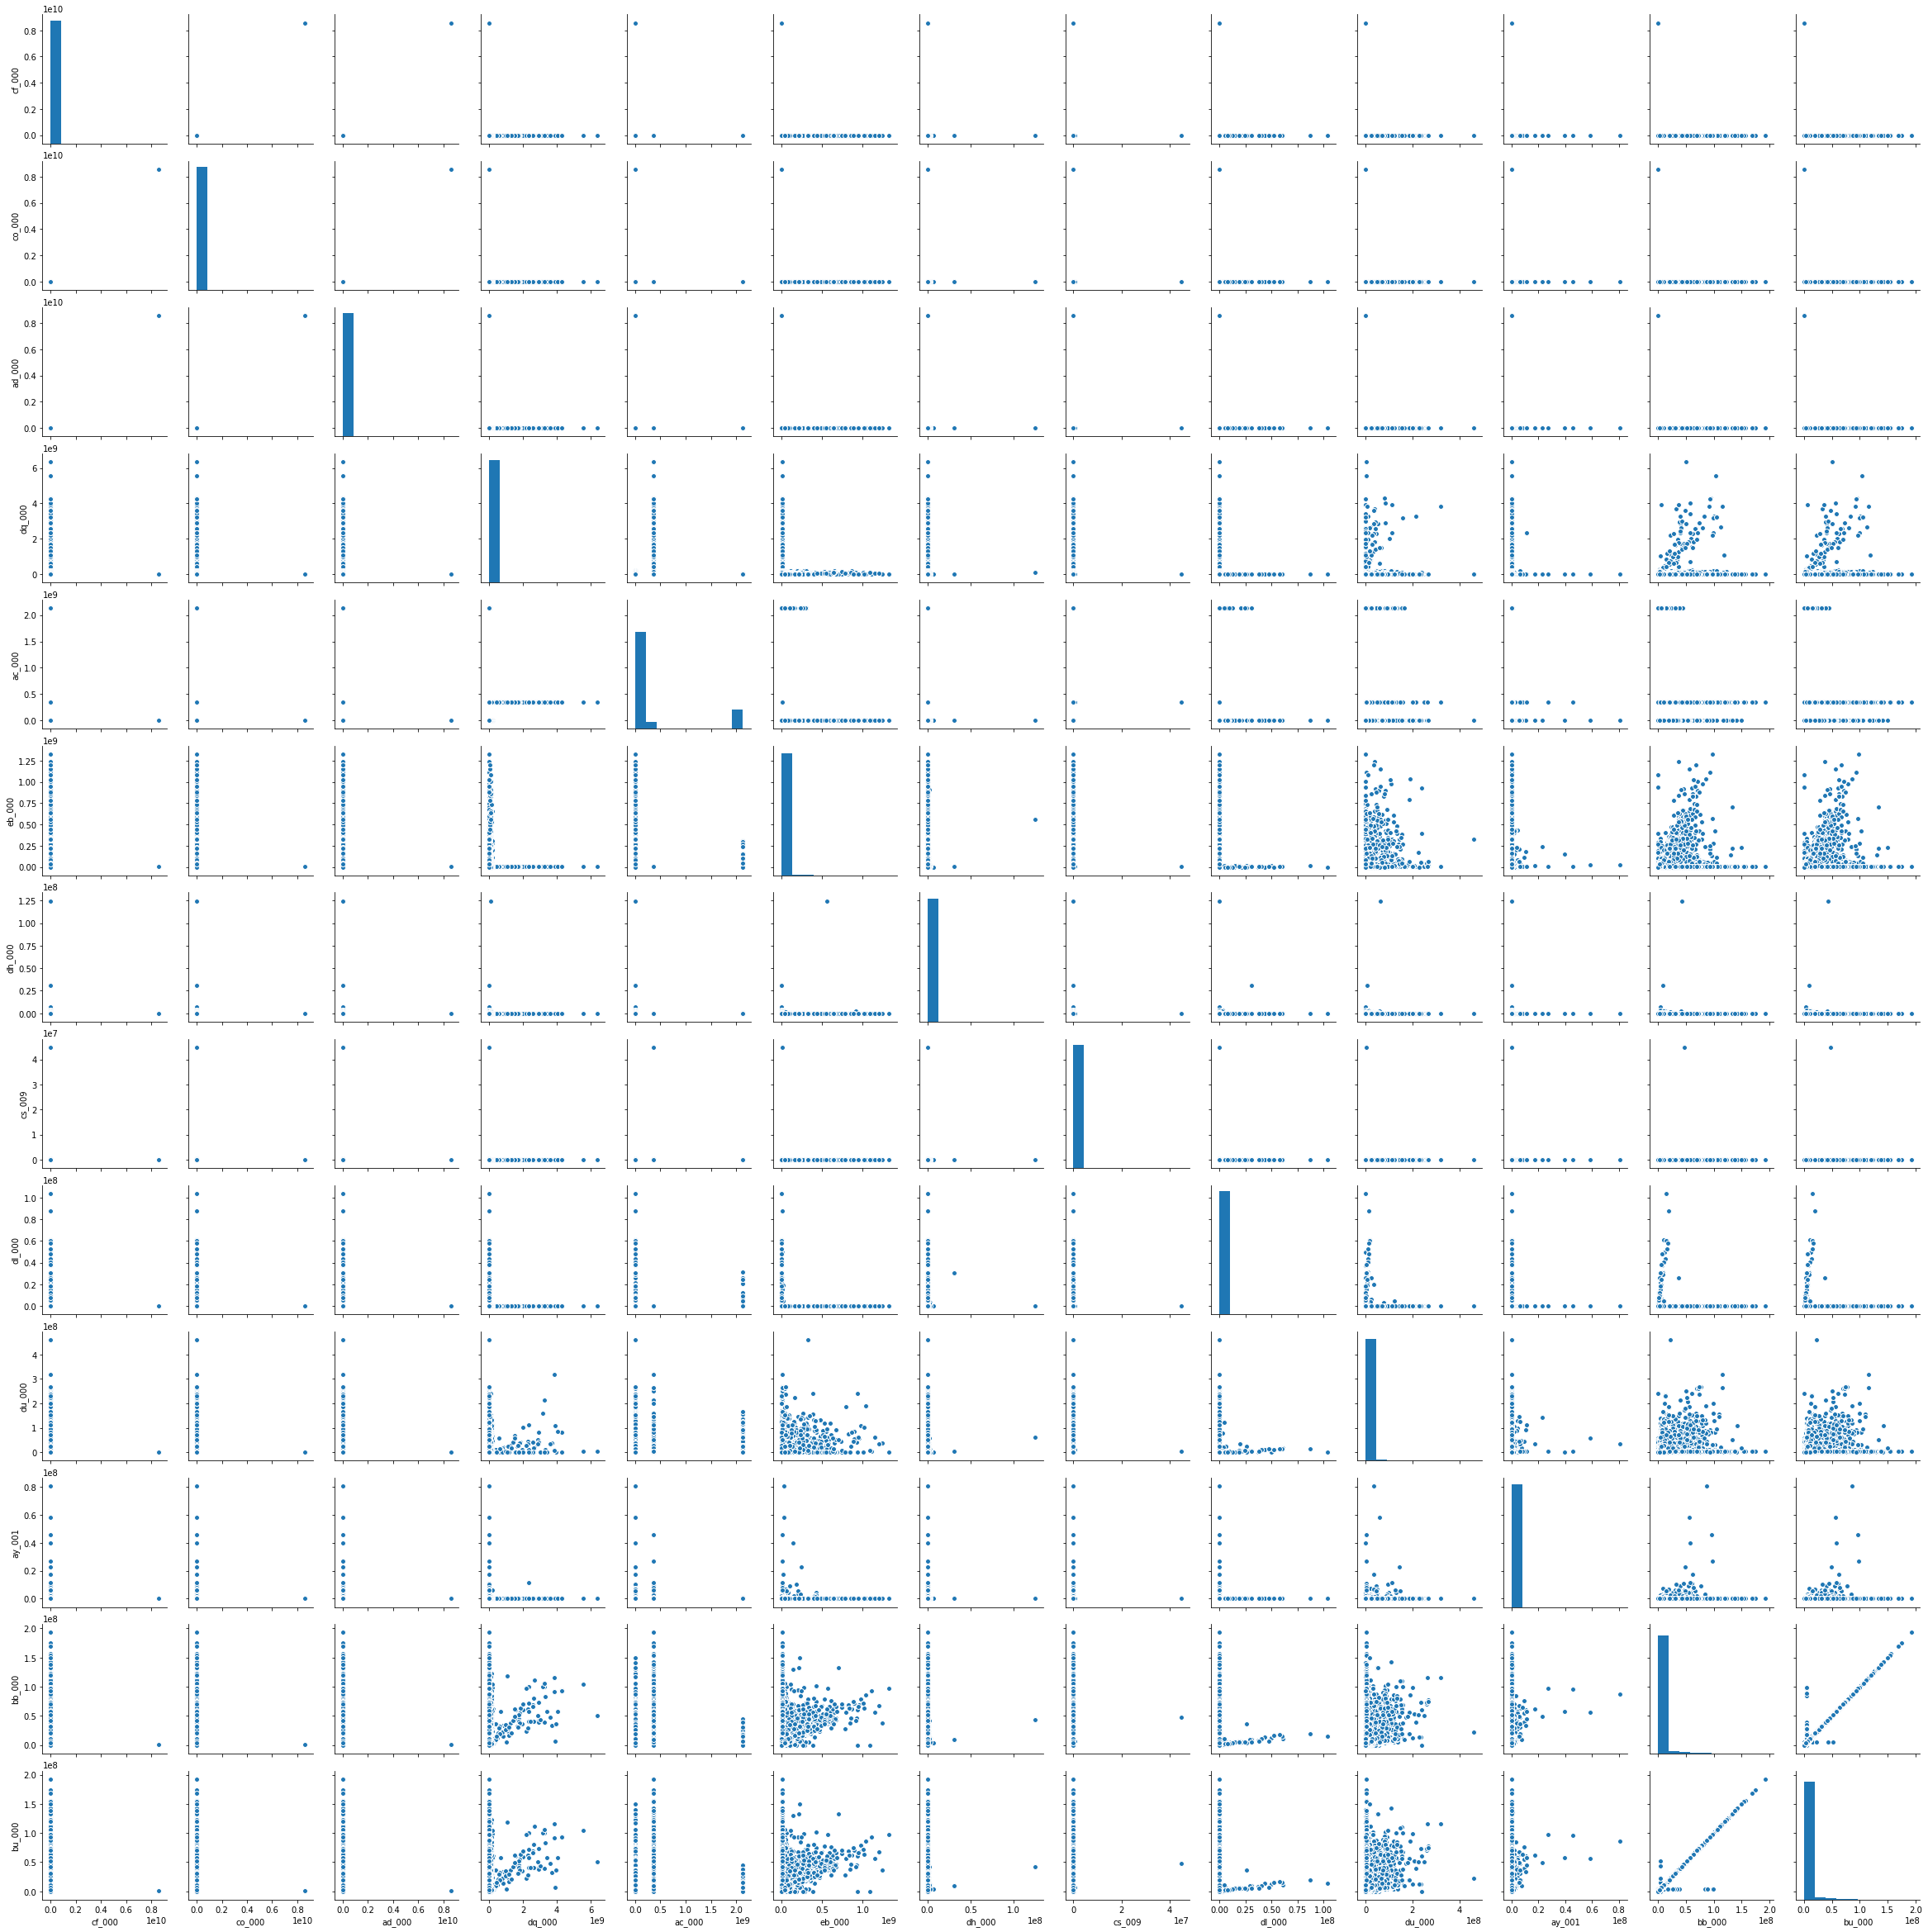

In [10]:
selcol = npa1[highvar11[0]]
sns.pairplot(selcol)


#### The features PctRecLmming, PctRecentlmming are linearaly related. For other we cannot deduce anything substantial outcome

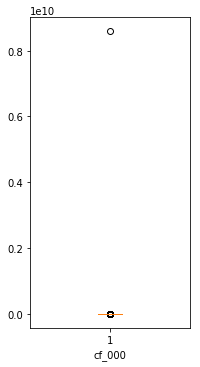

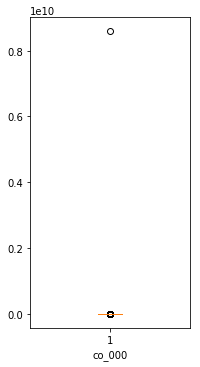

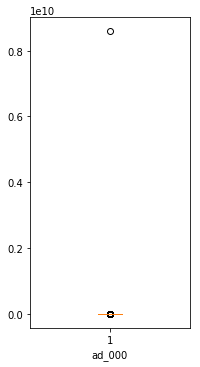

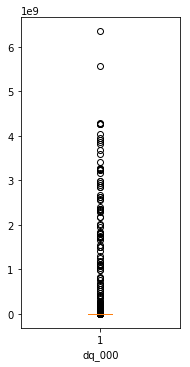

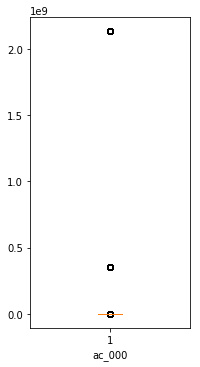

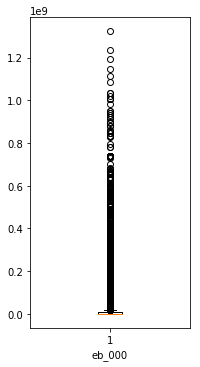

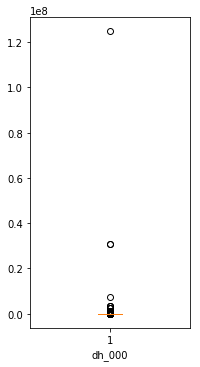

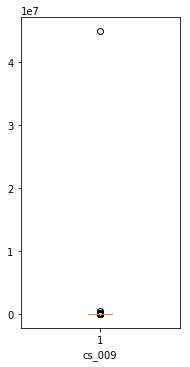

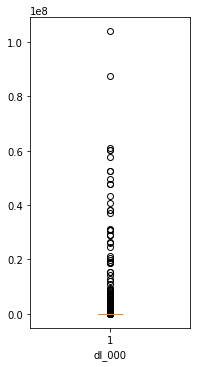

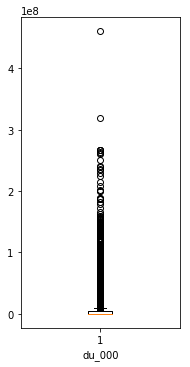

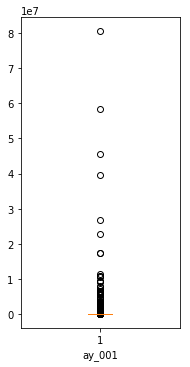

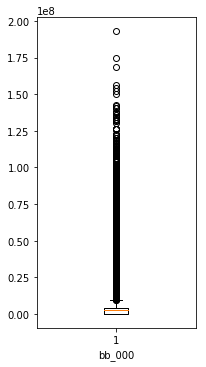

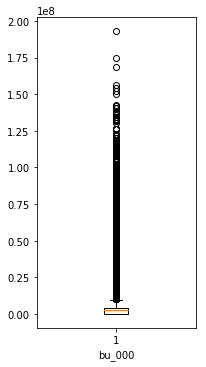

In [32]:
box = selcol.columns
i=1
for eachcol in box:
    plt.subplots(figsize=(20, 40))
    plt.subplot(6,6,i)
    plt.xlabel(eachcol)
    plt.boxplot(selcol[eachcol])
    i=i+1

##### Q2 B 5 Determine the number of positive and negative data. Is this data set imbalanced? 

In [33]:
print(df_train_mean['class'].value_counts())

neg    59000
pos     1000
Name: class, dtype: int64


##### Q2 C Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassication for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

[[15624     1]
 [  304    71]]


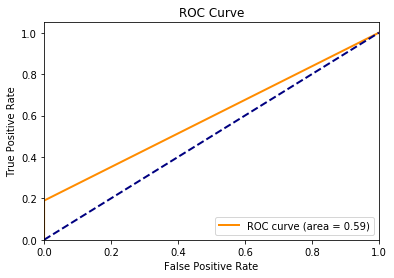

In [17]:
#Unbalanced
randomforest_train_mean = df_train_mean
randomforest_test_mean = df_test_mean
randomforest_train_mean_x = randomforest_train_mean.iloc[:,1:]
randomforest_train_mean_y= randomforest_train_mean.iloc[:,0:1]
randomforest_test_mean_x = randomforest_test_mean.iloc[:,1:]
randomforest_test_mean_y= randomforest_test_mean.iloc[:,0:1]


clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True)


clf.fit(randomforest_train_mean_x,randomforest_train_mean_y.values.ravel())

rand_prd_y = clf.predict(randomforest_test_mean_x)


conf= confusion_matrix(randomforest_test_mean_y,rand_prd_y)
print(conf)


randomforest_test_mean_y_bin =randomforest_test_mean_y
#randomforest_test_mean_y_bin['class'] = pd.factorize(randomforest_test_mean_y_bin['class'])[0] + 1
lb = preprocessing.LabelBinarizer()
randomforest_test_mean_y_bin =lb.fit_transform(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin =pd.DataFrame(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin =pd.DataFrame(rand_prd_y)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin=lb.fit_transform(rand_prd_y_bin)
rand_prd_y_bin =pd.DataFrame(rand_prd_y_bin)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
randomforest_test_mean_y_bin


fpr, tpr, _ = roc_curve(randomforest_test_mean_y_bin,rand_prd_y_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()



In [18]:
oob_error = 1 - clf.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf[0][0]+conf[1][1])/float(conf[0][0]+conf[1][1]+conf[0][1]+conf[1][0])))

oob score  0.014100000000000001
test set misclassification error 0.019062499999999982


##### Q2 d Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

####### Problem of the class imbalance can be handled by Random Forests as well as the SMOTE
Making more deeper trees with more features will help the model to classify better and accurately this way the rare classes can be classifed accurately

####### Using the SMOTE we can upsample the rare class this will help the model to get trained better and can accurately predict if rare class is given for the prediction.

[[14668   957]
 [   12   363]]


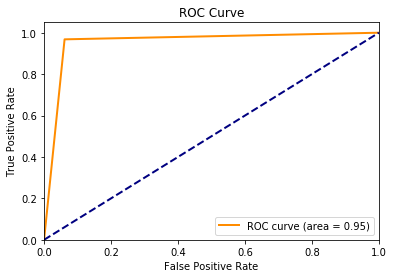

In [14]:
# balanced


randomforest_train_mean = df_train_mean
randomforest_test_mean = df_test_mean
randomforest_train_mean_x = randomforest_train_mean.iloc[:,1:]
randomforest_train_mean_y= randomforest_train_mean.iloc[:,0:1]
randomforest_test_mean_x = randomforest_test_mean.iloc[:,1:]
randomforest_test_mean_y= randomforest_test_mean.iloc[:,0:1]


clf1 = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0,oob_score=True,class_weight="balanced_subsample")


clf1.fit(randomforest_train_mean_x,randomforest_train_mean_y.values.ravel())

rand_prd_y = clf1.predict(randomforest_test_mean_x)


conf1 = confusion_matrix(randomforest_test_mean_y,rand_prd_y)
print(conf1)
randomforest_test_mean_y_bin =randomforest_test_mean_y
#randomforest_test_mean_y_bin['class'] = pd.factorize(randomforest_test_mean_y_bin['class'])[0] + 1
lb = preprocessing.LabelBinarizer()
randomforest_test_mean_y_bin =lb.fit_transform(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin =pd.DataFrame(randomforest_test_mean_y_bin)
randomforest_test_mean_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin =pd.DataFrame(rand_prd_y)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
rand_prd_y_bin=lb.fit_transform(rand_prd_y_bin)
rand_prd_y_bin =pd.DataFrame(rand_prd_y_bin)
rand_prd_y_bin.rename(columns={0:'class'},inplace=True)
randomforest_test_mean_y_bin


fpr, tpr, _ = roc_curve(randomforest_test_mean_y_bin,rand_prd_y_bin)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
oob_error = 1 - clf1.oob_score_
print('oob score ', oob_error)
print('test set misclassification error', 1 - (float(conf1[0][0]+conf1[1][1])/float(conf1[0][0]+conf1[1][1]+conf1[0][1]+conf1[1][0])))

oob score  0.06468333333333331
test set misclassification error 0.060562499999999964


##### Q2 E Model Trees

In [75]:
from weka.classifiers import Classifier
from weka.classifiers import Evaluation

In [76]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier

jvm.start()



INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [77]:
import weka.core.converters as converters
#loader = Loader("weka.core.converters.CSVLoader")
#d = loader.load_any_file("aps_failure_training_set 1.csv")
df_train_weka = converters.load_any_file(filename='df_train_mean.csv')
df_train_weka.class_is_first()
df_test_weka = converters.load_any_file(filename='df_test_mean.csv')
df_test_weka.class_is_first()

In [78]:
for i in df_train_weka:
    print(i)
    break


neg,76698,0.713189,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,551389.7993,582871.3229,604886.6133,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,37.06298,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0


In [79]:
c = Classifier(classname ="weka.classifiers.trees.LMT")
#c.build_classifier(df_train_weka)
train_eval = Evaluation(df_train_weka)

In [80]:
#train_eval.test_model(c, df_train_weka)
from weka.core.classes import Random

In [81]:
pred = train_eval.crossvalidate_model(classifier=c,data=df_train_weka,num_folds=5,rnd=Random(42))

In [25]:
print("Cross Validation and Confusion Matrix TRAIN")

Cross Validation and Confusion Matrix TRAIN


In [86]:
#print("Cross Validation and Confusion Matrix TRAIN")
print("CV Error = %.2f%%" % (train_eval.percent_incorrect))
print(train_eval.matrix())



CV Error = 0.84%
=== Confusion Matrix ===

     a     b   <-- classified as
 58812   188 |     a = neg
   316   684 |     b = pos



In [96]:
#ROC for TRAIN
cls = Classifier.make_copy(c)
cls.build_classifier(df_train_weka)
df_train_meanroc

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0.713189,2130706438,280.0000,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,0.713189,0,190620.6393,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,0.713189,228,100.0000,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.000000,70,66.0000,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,0.713189,1368,458.0000,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,0.713189,2130706432,218.0000,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.000000,6,190620.6393,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,0.713189,2130706432,116.0000,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,0.713189,0,190620.6393,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.000000,182,190620.6393,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [97]:
pred1 = train_eval.test_model(cls,df_train_weka)
df_train_meanroc = pd.read_csv('df_train_mean.csv')
actual = np.array(np.where(df_train_meanroc['class']=='neg',0,1))
fpr, tpr, _ = roc_curve(actual,pred1)

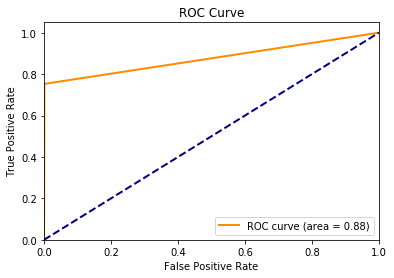

In [98]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [99]:
# Test set 

In [102]:
#cls1 = Classifier.make_copy(c)
cls.build_classifier(df_train_weka)
test_eval = Evaluation(df_test_weka)
test_eval.test_model(cls, df_test_weka)
print("Test Error: %.2f%%" % (test_eval.percent_incorrect))
print(test_eval.matrix())

Test Error: 0.97%
=== Confusion Matrix ===

     a     b   <-- classified as
 15584    41 |     a = neg
   115   260 |     b = pos



In [ ]:
pred1 = train_eval.test_model(cls,df_test_weka)
df_test_meanroc = pd.read_csv('df_test_mean.csv')
actual = np.array(np.where(df_test_meanroc['class']=='neg',0,1))
fpr, tpr, _ = roc_curve(actual,pred1)

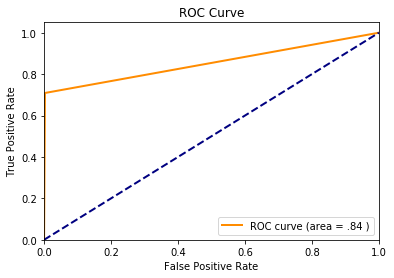

In [54]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()